In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
# % matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import plotly.express as px




import warnings
warnings.filterwarnings("ignore")


#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2  
import h5py
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
# from keras.applications.resnet50 import ResNet50

In [2]:
my_arrays_final = np.load("/kaggle/input/car-damage-updated-data/Car_damage_aug_dataset_final_1.npz", allow_pickle=True)


In [3]:
# Extract the X_train, y_train, X_test, and y_test arrays from the data
X_train = my_arrays_final['X_train']
y_train = my_arrays_final['y_train']
X_test = my_arrays_final['X_test']
y_test = my_arrays_final['y_test']

In [4]:
# Print the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (14738, 128, 128, 3)
y_train shape: (14738,)
X_test shape: (6317, 128, 128, 3)
y_test shape: (6317,)


In [6]:
featuresTrain_1 = np.load("/kaggle/input/vgg16-features/FineTuneVGGfeatures_128_128_train_1.npy")

In [7]:
featuresTrain_1.shape

(14738, 3)

In [8]:
featuresVal_1 = np.load("/kaggle/input/vgg16-features/FineTuneVGGfeatures_128_128_val_1.npy")

In [9]:
featuresVal_1.shape

(6317, 3)

In [10]:
# Perform LDA on the training data
lda = LDA(n_components=2)
lda_scores = lda.fit_transform(featuresTrain_1, y_train)


In [11]:
# Create a DataFrame combining the LDA scores with the target variable
lda_df = pd.DataFrame(lda_scores, columns=['LDA1', 'LDA2'])
lda_df['target'] = y_train


In [12]:
lda_df

,LDA1,LDA2,target
0,8.260811,2.519884,2
1,-8.211460,3.251906,0
2,-8.211502,3.251952,0
3,-0.813926,-5.824234,1
4,8.286805,2.519902,2
...,...,...,...
14733,-8.211502,3.251952,0
14734,-8.211396,3.251891,0
14735,-0.713223,-6.216415,1
14736,-0.712869,-6.217163,1


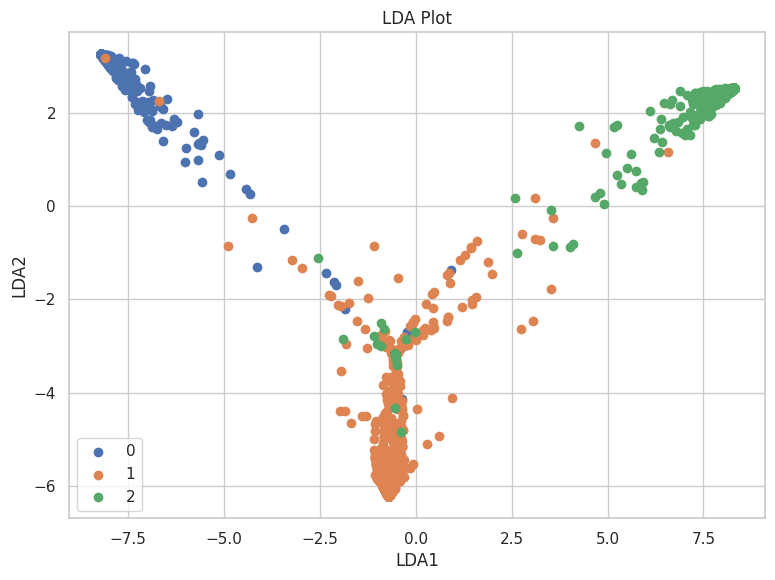

In [13]:
# Create a scatter plot of the LDA scores
plt.figure(figsize=(8, 6))
for target in np.unique(y_train):
    plt.scatter(lda_scores[y_train == target, 0], lda_scores[y_train == target, 1], label=target)

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA Plot')
plt.legend()
plt.show()

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(featuresTrain_1)
print(tsne.kl_divergence_)

0.6131623983383179


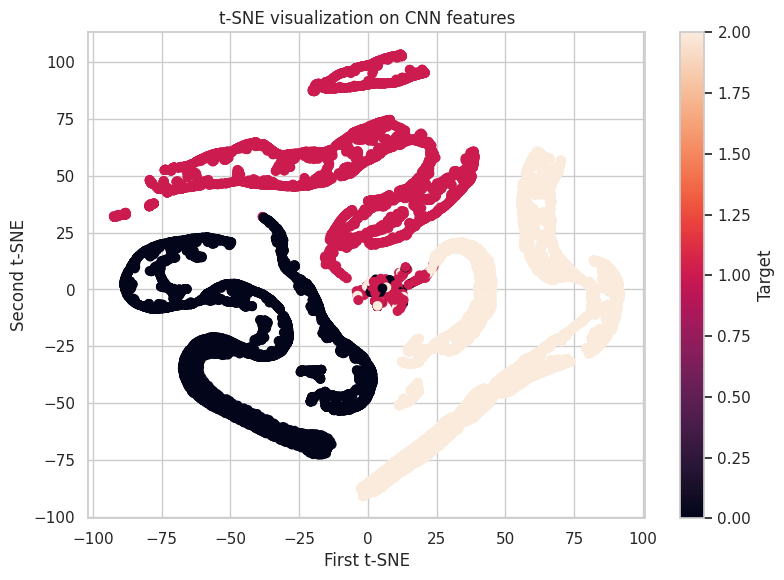

In [15]:
# Create a scatter plot of the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
plt.title("t-SNE visualization on CNN features")
plt.xlabel("First t-SNE")
plt.ylabel("Second t-SNE")
plt.colorbar(label="Target")
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
lr = LogisticRegression()
lr.fit(featuresTrain_1, y_train)
lr_predictions_train = lr.predict(featuresTrain_1)
lr_predictions_test = lr.predict(featuresVal_1)
lr_train_accuracy = accuracy_score(y_train, lr_predictions_train)
lr_test_accuracy = accuracy_score(y_test, lr_predictions_test)

print("Logistic Regression - Training Accuracy: %0.2f" % lr_train_accuracy)
print("Logistic Regression - Test Accuracy: %0.2f" % lr_test_accuracy)
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, lr_predictions_test))

# Random Forest Classifier
rf_1 = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2)
rf_1.fit(featuresTrain_1, y_train)
rf_predictions_train = rf_1.predict(featuresTrain_1)
rf_predictions_test = rf_1.predict(featuresVal_1)
rf_train_accuracy = accuracy_score(y_train, rf_predictions_train)
rf_test_accuracy = accuracy_score(y_test, rf_predictions_test)

print("Random Forest Classifier - Training Accuracy: %0.2f" % rf_train_accuracy)
print("Random Forest Classifier - Test Accuracy: %0.2f" % rf_test_accuracy)
print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, rf_predictions_test))

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(featuresTrain_1, y_train)
svm_predictions_train = svm.predict(featuresTrain_1)
svm_predictions_test = svm.predict(featuresVal_1)
svm_train_accuracy = accuracy_score(y_train, svm_predictions_train)
svm_test_accuracy = accuracy_score(y_test, svm_predictions_test)

print("Support Vector Machine - Training Accuracy: %0.2f" % svm_train_accuracy)
print("Support Vector Machine - Test Accuracy: %0.2f" % svm_test_accuracy)
print("Support Vector Machine - Classification Report:")
print(classification_report(y_test, svm_predictions_test))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(featuresTrain_1, y_train)
gb_predictions_train = gb.predict(featuresTrain_1)
gb_predictions_test = gb.predict(featuresVal_1)
gb_train_accuracy = accuracy_score(y_train, gb_predictions_train)
gb_test_accuracy = accuracy_score(y_test, gb_predictions_test)

print("Gradient Boosting Classifier - Training Accuracy: %0.2f" % gb_train_accuracy)
print("Gradient Boosting Classifier - Test Accuracy: %0.2f" % gb_test_accuracy)
print("Gradient Boosting Classifier - Classification Report:")
print(classification_report(y_test, gb_predictions_test))


Logistic Regression - Training Accuracy: 0.98
Logistic Regression - Test Accuracy: 0.80
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2023
           1       0.78      0.67      0.72      2070
           2       0.80      0.87      0.83      2224

    accuracy                           0.80      6317
   macro avg       0.80      0.80      0.80      6317
weighted avg       0.80      0.80      0.80      6317

Random Forest Classifier - Training Accuracy: 0.99
Random Forest Classifier - Test Accuracy: 0.80
Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2023
           1       0.76      0.70      0.73      2070
           2       0.81      0.86      0.84      2224

    accuracy                           0.80      6317
   macro avg       0.80      0.80      0.80      6317
weighted avg

In [30]:
# create an XGBClassifier
xgb_1 = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=5)

# evaluate the XGBClassifier using cross-validation
scores = cross_val_score(xgb_1, featuresTrain_1, y_train, cv=5)

print("XGBClassifier - Training Accuracy: %0.2f" % (scores.mean()))

# fit the XGBClassifier to the entire training set
xgb_1.fit(featuresTrain_1, y_train)

# calculate validation accuracy
val_accuracy = xgb_1.score(featuresVal_1, y_test)

print("XGBClassifier - Validation Accuracy: %0.2f" % val_accuracy)

XGBClassifier - Training Accuracy: 0.98
XGBClassifier - Validation Accuracy: 0.80


In [31]:
# generate predictions on the testing set
y_pred = xgb_1.predict(featuresVal_1)

# generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2023
           1       0.76      0.70      0.73      2070
           2       0.81      0.86      0.84      2224

    accuracy                           0.80      6317
   macro avg       0.80      0.80      0.80      6317
weighted avg       0.80      0.80      0.80      6317



In [32]:
# create an AdaBoost classifier
ada_1 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# evaluate the AdaBoost classifier using cross-validation
scores = cross_val_score(ada_1, featuresTrain_1, y_train, cv=5)

print("AdaBoostClassifier - Training Accuracy: %0.2f" % (scores.mean()))

# fit the AdaBoost classifier to the entire training set
ada_1.fit(featuresTrain_1, y_train)

# calculate validation accuracy
val_accuracy = ada_1.score(featuresVal_1, y_test)

print("AdaBoostClassifier - Validation Accuracy: %0.2f" % val_accuracy)

AdaBoostClassifier - Training Accuracy: 0.79
AdaBoostClassifier - Validation Accuracy: 0.80


In [33]:
# generate predictions on the testing set
y_pred = ada_1.predict(featuresVal_1)

# generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2023
           1       0.76      0.69      0.73      2070
           2       0.81      0.87      0.84      2224

    accuracy                           0.80      6317
   macro avg       0.80      0.80      0.80      6317
weighted avg       0.80      0.80      0.80      6317

